# Hands-On Assignment 5

5. PCA & k-NN

## After finishing writing the code for each problem, submit your ipynb file (i.e., this file) to Cybercampus by **12/8 Sunday 23:59**

### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name: Dayeon Jang
    Student ID: 2176319

    Name:
    Student ID:



---


## 5. PCA and k-NN with MNIST


---



Load the dataset


*   source: https://www.kaggle.com/oddrationale/mnist-in-csv



In [1]:
import pandas as pd

df_train = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_train.csv')
df_test = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

Overview the dataset

In [2]:
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

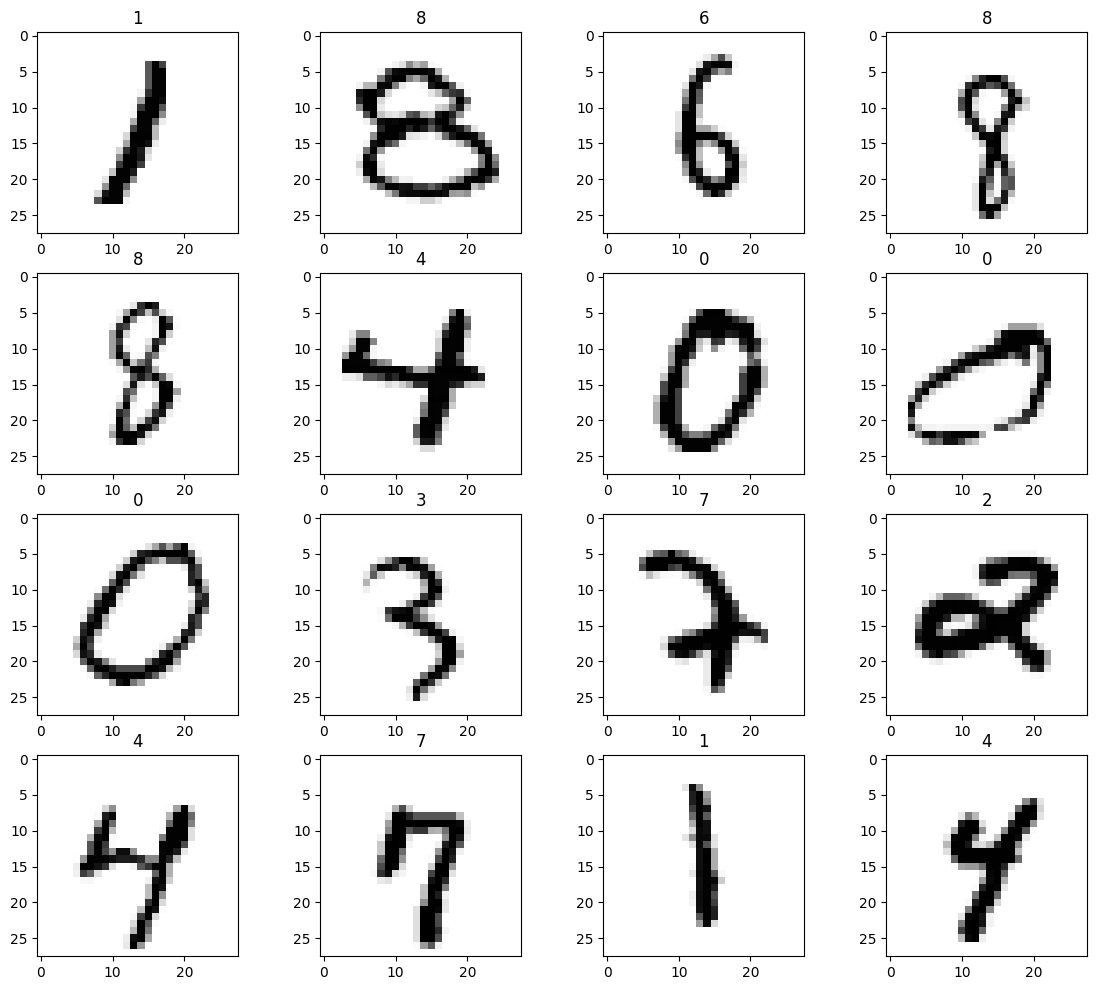

In [6]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, 60000), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28, 28),
               cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

TO-DO:


1.   Use k-NN to classifiy the MNIST dataset and report the accuracy and time to elapse for the classification

  *   Use scikit-learn library if you'd like
  *   Use k=10
  *   Train:Test = 75:25

2. Let's use PCA + k-NN to reduce the dimension and GridSearchCV to select the optimal number of principal components and k in k-NN.
*   To use PCA + k-NN together, use the following pipe as the esimater of GridSearchCV.

    *   pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

*   Use the following parameter to find the optimal number of principal components and k

  *   parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

*   Use 5 fold cross valiation in GridSearchCV

3. Report the best accuracy and parameters

4. Using the best estimator with the best parameters, re-evaluate the testing set and measure the time to elapse.

5. Discuss whether the PCA improves the efficiency as well as effectiveness of the k-NN classifier



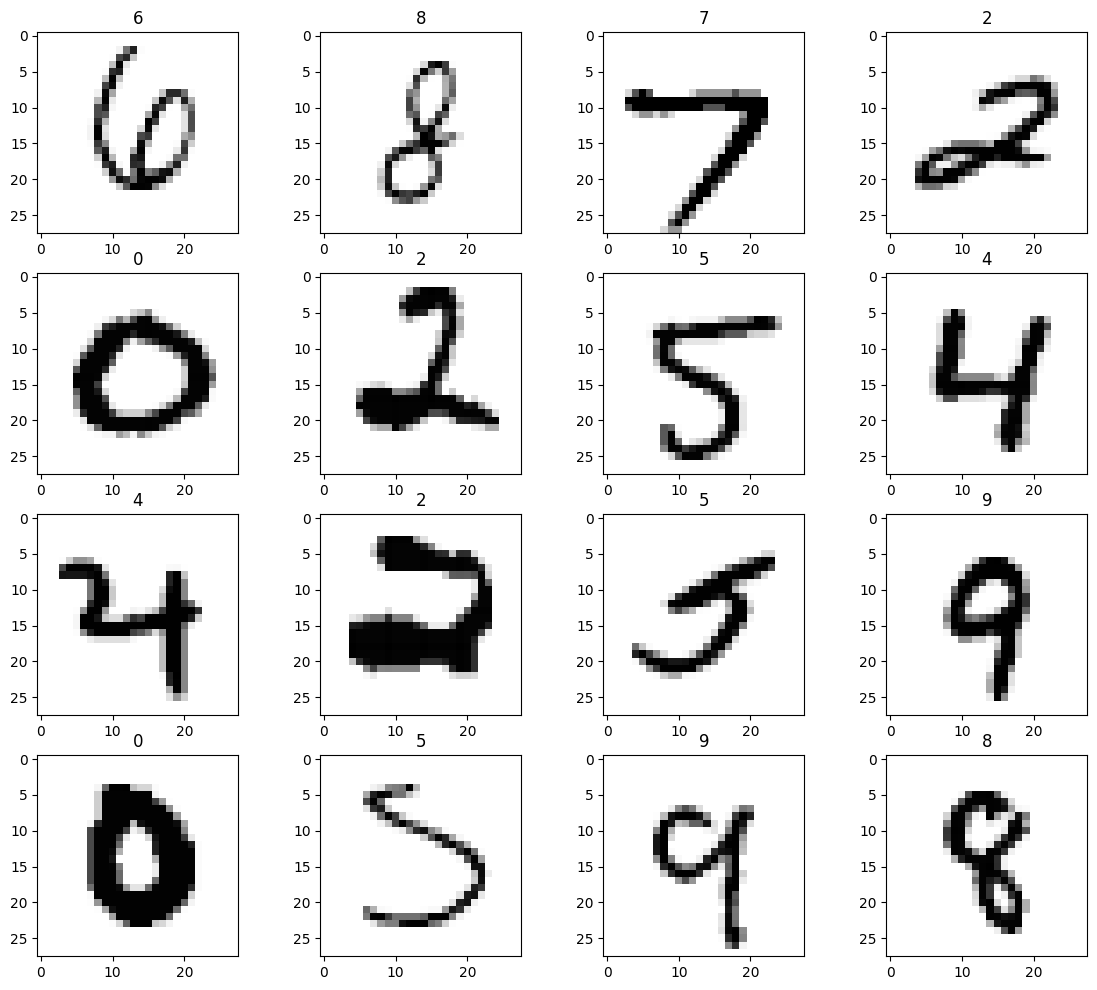

k-NN without PCA
Accuracy: 0.9646
Time Elapsed: 72.7791 seconds

PCA + k-NN
Best Parameters: {'clf__n_neighbors': 5, 'pca__n_components': 10}
Best Cross-Validation Accuracy: 0.9294
Time Elapsed for GridSearchCV: 144.6420 seconds

Re-evaluating Test Set with Best Estimator
Accuracy: 0.9298
Time Elapsed for Testing: 4.0507 seconds


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Convert labels to integers

# Split data into train and test sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Visualize some random samples from the training data
samples = random.choices(population=range(len(X_train)), k=16)
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train.iloc[n].values.reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title(y_train.iloc[n])

plt.show()

# k-NN classification without PCA
k = 10
knn = KNeighborsClassifier(n_neighbors=k)

start_time = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
k_nn_time = time.time() - start_time
k_nn_accuracy = accuracy_score(y_test, y_pred)

print("k-NN without PCA")
print(f"Accuracy: {k_nn_accuracy:.4f}")
print(f"Time Elapsed: {k_nn_time:.4f} seconds")

# PCA + k-NN with GridSearchCV
pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components': [2, 5, 10],
    'clf__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
pca_knn_time = time.time() - start_time

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("\nPCA + k-NN")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")
print(f"Time Elapsed for GridSearchCV: {pca_knn_time:.4f} seconds")

# Re-evaluate on the test set using the best parameters
start_time = time.time()
y_test_pred = best_estimator.predict(X_test)
pca_knn_test_time = time.time() - start_time
pca_knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nRe-evaluating Test Set with Best Estimator")
print(f"Accuracy: {pca_knn_test_accuracy:.4f}")
print(f"Time Elapsed for Testing: {pca_knn_test_time:.4f} seconds")


# **5. PCA and k-NN with MNIST**


**k-NN without PCA**  
Accuracy: 0.9646  
Time Elapsed: 72.7791 seconds  

**PCA + k-NN**  
Best Parameters: {'clf__n_neighbors': 5, 'pca__n_components': 10}  
Best Cross-Validation Accuracy: 0.9294  
Time Elapsed for GridSearchCV: 144.6420 seconds  

**Re-evaluating Test Set with Best Estimator**  
Accuracy: 0.9298  
Time Elapsed for Testing: 4.0507 seconds     


In my results, the k-NN classifier with PCA showed the following outcomes:    

**Efficiency**  
The computation time increased compared to when PCA was not used.

Without PCA: 71.9863 seconds  
With PCA + GridSearchCV: 144.0287 seconds  
This is because using PCA introduced additional computation to reduce the dimensionality of the data, and GridSearchCV required extra time to find the optimal parameters. Therefore, in this case, PCA did not improve efficiency.

**Effectiveness**  
The accuracy decreased compared to when PCA was not applied.

Without PCA: 0.9646  
With PCA: 0.9294  
This seems to be due to the loss of some important feature information during dimensionality reduction. Since the MNIST dataset’s numerical image features are well represented in high dimensions, using only principal components may not have been sufficient to capture the detailed differences between numbers.